In [ ]:
%load_ext rpy2.ipython

In [2]:
%%R
library(tidyverse)
library(ggpubr)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
%%R
source("R/theme.R")

In [4]:
%%R
samples_metadata <- read_tsv("metadata/samples_metadata_imm_272S.tsv")
samples_metadata$Vac_Group <- factor(samples_metadata$Vac_Group, levels=c("SinoVac", "BioNTech"))

Rows: 272 Columns: 58
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): sample_id, ID, TimePoint, Cohort, Vac_Group, Dose1_AE_num_cat, Dos...
dbl (51): all_bray_cluster3, Age, Male, BMI, OWOB, Obese_bin, HTC_bin, DMC_b...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [32]:
%%R
vaccines_color <- c("BioNTech"="#59b4e5",
                    "SinoVac"="#d56128")

## Figure 1c

R[write to console]: Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

R[write to console]: Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



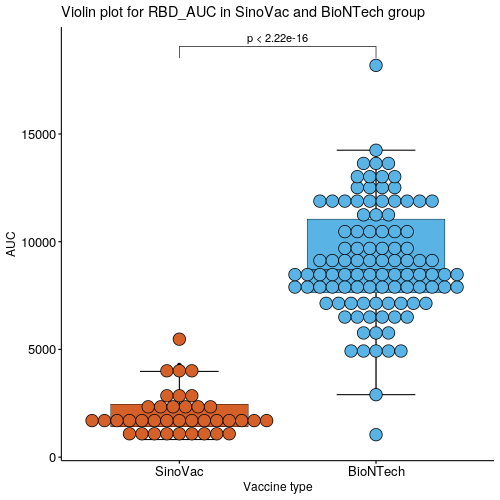

In [10]:
%%R -w 500 -h 500
p <- ggboxplot(samples_metadata %>% filter(TimePoint=="D0"),
                     x = "Vac_Group", y = "AUC_100_12800",
                     fill = "Vac_Group", add = "dotplot",
                     bxp.errorbar=TRUE, 
                     #bxp.errorbar.width = 1,
                     color = "black",
                     binwidth=0.1, size=0.2) +
    stat_compare_means(comparisons = list(c("BioNTech", "SinoVac")), method="wilcox.test", paired=F) +
    scale_fill_manual(values=vaccines_color) +
    xlab("Vaccine type") + ylab("AUC") +
    theme(axis.text.x=element_text(size=13),
          axis.text.y=element_text(size=13),
          legend.text=element_text(size=13)) +
    guides(fill=FALSE) +
    ggtitle("Violin plot for RBD_AUC in SinoVac and BioNTech group") #+
    #geom_hline(yintercept=60, linetype="dashed", color="red")
print(p)
ggsave("figures/violinplot_RBD_AUC_SinoVac_BioNTech.pdf", width=8, height=8)

## Figure 1b

R[write to console]: Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

R[write to console]: Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



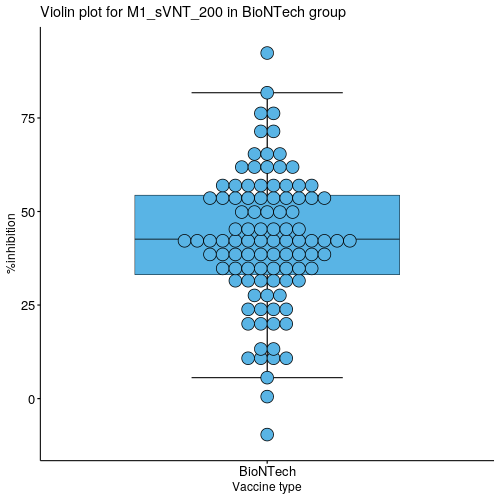

In [13]:
%%R -w 500 -h 500
p <- ggboxplot(samples_metadata %>% filter(TimePoint=="D0") %>% filter(Vac_Group=="BioNTech"),
                     x = "Vac_Group", y = "M1_sVNT_200",
                     fill = "Vac_Group", add = "dotplot",
                     bxp.errorbar=TRUE, 
                     #bxp.errorbar.width = 1,
                     color = "black",
                     binwidth=0.1, size=0.2) +
    stat_compare_means(comparisons = list(c("BioNTech", "SinoVac")), method="wilcox.test", paired=F) +
    scale_fill_manual(values=vaccines_color) +
    xlab("Vaccine type") + ylab("%inhibition") +
    theme(axis.text.x=element_text(size=13),
          axis.text.y=element_text(size=13),
          legend.text=element_text(size=13)) +
    guides(fill=FALSE) +
    ggtitle("Violin plot for M1_sVNT_200 in BioNTech group") #+
    #geom_hline(yintercept=60, linetype="dashed", color="red")
print(p)
ggsave("figures/violinplot_sVNT_200_BioNTech.pdf", width=8, height=8)

In [18]:
%%R
D0_sVNT <- samples_metadata %>% 
    filter(TimePoint=="D0") %>%
    select(ID, Vac_Group, TimePoint, M0_sVNT) %>%
    distinct() %>%
    rename(sVNT=M0_sVNT)
    

M1_sVNT <- samples_metadata %>%
    filter(TimePoint=="D0") %>%
    select(ID, Vac_Group, TimePoint, M1_sVNT) %>%
    distinct() %>%
    rename(sVNT=M1_sVNT) %>%
    mutate(TimePoint="M1")
    
sVNT <- D0_sVNT %>% bind_rows(M1_sVNT) %>% arrange(ID)

dim(sVNT)

[1] 276   4


## Figure 1a

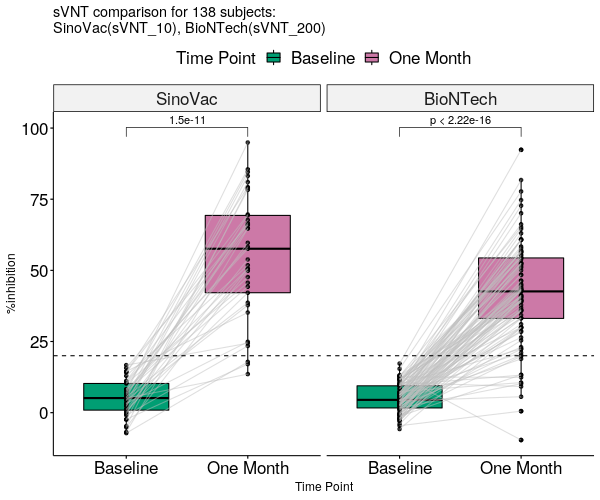

In [20]:
%%R -w 600 -h 500
p <- 
    ggboxplot(sVNT,
              x="TimePoint", y="sVNT", fill="TimePoint") +
    #geom_boxplot(aes(fill=TimePoint)) +
    geom_jitter(position = position_jitter(height = 0, width=0), alpha=0.8) +
    geom_line(aes(group=ID), color="grey", alpha=0.5) +
    facet_wrap(~ Vac_Group) +
    stat_compare_means(comparisons = list(c("D0", "M1")), method = "wilcox.test", paired=T) +
    scale_fill_manual(values = timepoint_color_values,
                      name = "Time Point",
                      breaks=c("D0", "M1"), labels=c("Baseline", "One Month")) +
    scale_x_discrete(labels=c("D0" = "Baseline", "M1" = "One Month")) +
    theme(axis.text.x = element_text(size=17),
          axis.text.y = element_text(size=17)) +
    theme(strip.text.x = element_text(size = 17),
          strip.text.y = element_text(size = 17),
          legend.title = element_text(size = 17,color = "black"),
          legend.text = element_text(size = 17,color = "black")) +
    ggtitle("sVNT comparison for 138 subjects:\nSinoVac(sVNT_10), BioNTech(sVNT_200)") +
    xlab("Time Point") + ylab("%inhibition") +
    geom_hline(yintercept=20, linetype="dashed", color="black")

print(p)

ggsave("figures/sVNT_comparison_138_subjects_sVNT_D0_M1_Sinovac_BioNTech.pdf", width=8, height=8)

In [22]:
%%R
cor_imm_biontech_svnt10_svnt200_df <-
    samples_metadata %>% filter(TimePoint=="D0" & Vac_Group=="BioNTech") %>%
    do(broom::tidy(cor.test(.$M1_sVNT_10, .$M1_sVNT_200, method="spearman"))) %>%
    mutate(pvalue_FDR=p.adjust(p.value, method="fdr")) %>%
    mutate(pvalue_BH=p.adjust(p.value, method="BH"))

In [27]:
%%R
vaccines_color <- c("BioNTech"="#59b4e5",
                    "SinoVac"="#d56128")

## Figure 1e

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



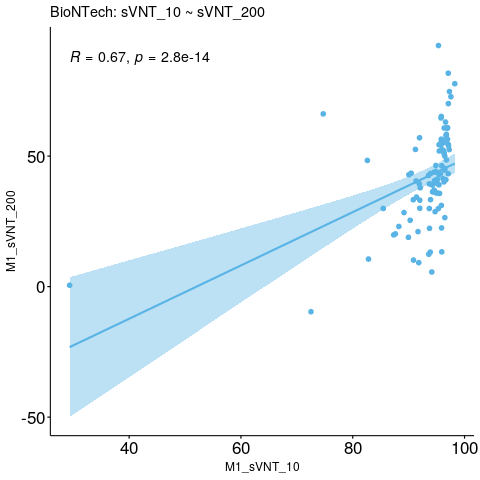

In [28]:
%%R
cor_imm_biontech_svnt10_svnt200 <- 
    ggscatter(samples_metadata %>% filter(TimePoint=="D0" & Vac_Group=="BioNTech") ,
              x="M1_sVNT_10", y="M1_sVNT_200", alpha=1, color = "#59b4e5",
              #group="TimePoint", fill="TimePoint", colour="TimePoint", shape="TimePoint",
              cor.method = "spearman", add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.coef.size=5) +
    #geom_smooth(aes(group=TimePoint, fill=TimePoint, colour=TimePoint)) +
    ggtitle("BioNTech: sVNT_10 ~ sVNT_200") +
    theme(axis.text.x = element_text(size=17),
          axis.text.y = element_text(size=17)) +
    theme(strip.text.x = element_text(size = 17),
          strip.text.y = element_text(size = 17))
print(cor_imm_biontech_svnt10_svnt200)

ggsave("../results/figures/V1/immune_outcomes/cor_imm_biontech_svnt10_svnt200.pdf",
       cor_imm_biontech_svnt10_svnt200, width=8, height=8)

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



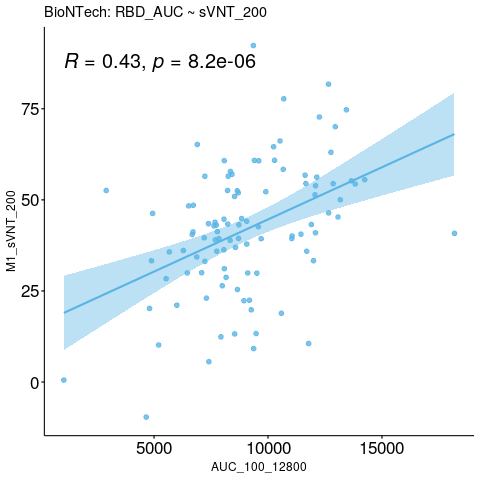

In [29]:
%%R
cor_imm_biontech_auc_svnt200 <- 
    ggscatter(samples_metadata %>% filter(TimePoint=="D0" & Vac_Group=="BioNTech") ,
              x="AUC_100_12800", y="M1_sVNT_200", alpha=0.8, color = "#59b4e5",
              #group="TimePoint", fill="TimePoint", colour="TimePoint", shape="TimePoint",
              cor.method = "spearman", add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.coef.size=7) +
    #geom_smooth(aes(group=TimePoint, fill=TimePoint, colour=TimePoint)) +
    ggtitle("BioNTech: RBD_AUC ~ sVNT_200") +
    theme(axis.text.x = element_text(size=17),
          axis.text.y = element_text(size=17)) +
    theme(strip.text.x = element_text(size = 17),
          strip.text.y = element_text(size = 17))
print(cor_imm_biontech_auc_svnt200)

ggsave("../results/figures/V1/immune_outcomes/cor_imm_biontech_auc_svnt200.pdf",
       cor_imm_biontech_auc_svnt200, width=8, height=8)

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



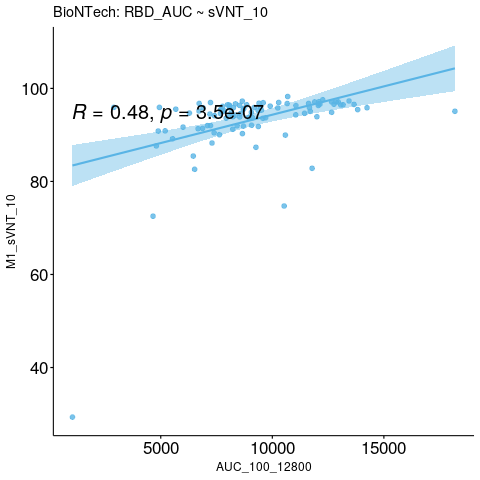

In [33]:
%%R
cor_imm_biontech_svnt10_auc <- 
    ggscatter(samples_metadata %>% filter(TimePoint=="D0" & Vac_Group=="BioNTech") ,
              y="M1_sVNT_10", x="AUC_100_12800", alpha=0.8, color = "#59b4e5",
              #group="TimePoint", fill="TimePoint", colour="TimePoint", shape="TimePoint",
              cor.method = "spearman", add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.coef.size=7) +
    #geom_smooth(aes(group=TimePoint, fill=TimePoint, colour=TimePoint)) +
    ggtitle("BioNTech: RBD_AUC ~ sVNT_10") +
    theme(axis.text.x = element_text(size=17),
          axis.text.y = element_text(size=17)) +
    theme(strip.text.x = element_text(size = 17),
          strip.text.y = element_text(size = 17))
print(cor_imm_biontech_svnt10_auc)

ggsave("../results/figures/V1/immune_outcomes/cor_imm_biontech_auc_svnt10.pdf",
       cor_imm_biontech_svnt10_auc, width=8, height=8)

## Figure 1d

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



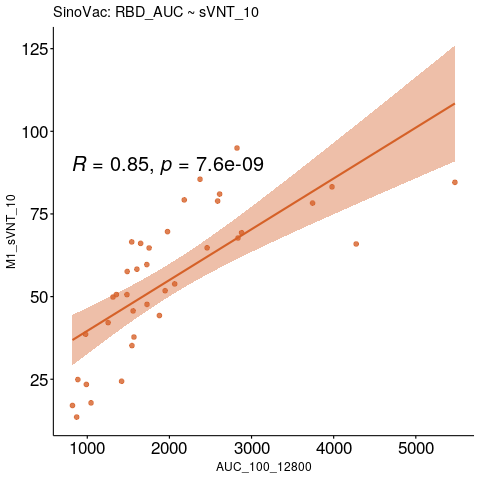

In [30]:
%%R
cor_imm_sinovac_svnt10_auc <- 
    ggscatter(samples_metadata %>% filter(TimePoint=="D0" & Vac_Group=="SinoVac") ,
              y="M1_sVNT_10", x="AUC_100_12800", alpha=0.8, color="#d56128",
              #group="TimePoint", fill="TimePoint", colour="TimePoint", shape="TimePoint",
              cor.method = "spearman", add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.coef.size=7) +
    #geom_smooth(aes(group=TimePoint, fill=TimePoint, colour=TimePoint)) +
    ggtitle("SinoVac: RBD_AUC ~ sVNT_10") +
    theme(axis.text.x = element_text(size=17),
          axis.text.y = element_text(size=17)) +
    theme(strip.text.x = element_text(size = 17),
          strip.text.y = element_text(size = 17))
print(cor_imm_sinovac_svnt10_auc)

ggsave("../results/figures/V1/immune_outcomes/cor_imm_sinovac_auc_svnt10.pdf",
       cor_imm_sinovac_svnt10_auc, width=8, height=8)